In [1]:
from ages_module import *
import matplotlib.pyplot as plt

plt.rc('text', usetex=0)
plt.rc('font', size=10, family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
plt.rc('legend', fontsize='small')
plt.rc('figure', figsize=(8, 6))
plt.rc('lines', linewidth=1.0)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

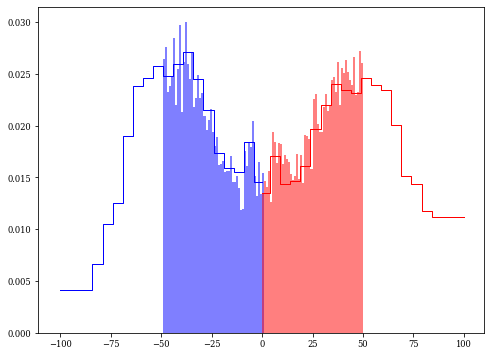

In [2]:
plt.figure(1)
x = np.array([0]+[el[1] for el in age_groups_demography])
ym = np.array(age_demograpy['male']) / np.sum(age_demograpy['male'])
yf = np.array(age_demograpy['female']) / np.sum(age_demograpy['female'])
ym = np.append([ym[0]], ym)
yf = np.append([yf[0]], yf)


hm = np.array(random_ages(male_age_demograpy_distribution, 0, 50, 10000))
hf = np.array(random_ages(female_age_demograpy_distribution, 0, 50, 10000))
plt.hist(-hm, bins=np.arange(-101,2), density=True, color='b', alpha=0.5, orientation='vertical')
h2 = plt.hist(hf, bins=np.arange(0,101), density=True, color='r', alpha=0.5, orientation='vertical')
rescale = yf[0] / h2[0][np.nonzero(h2[0])[0][0]]
plt.step(-x, ym/rescale, 'b', x, yf/rescale, 'r')

plt.show()

C:\Users\ThinkStation\Dropbox\Corona Virus\CoronaVirus\ages_module.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['age.' + sex + '.new.groups'][i] = new_day_groups


0

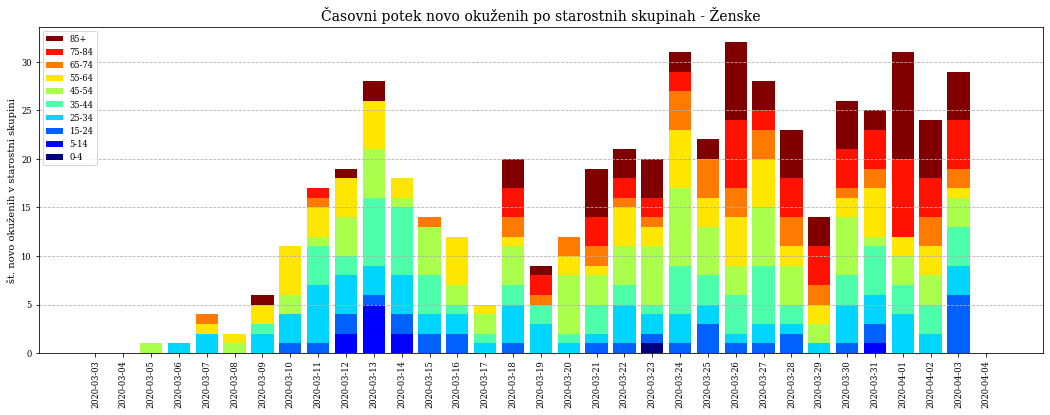

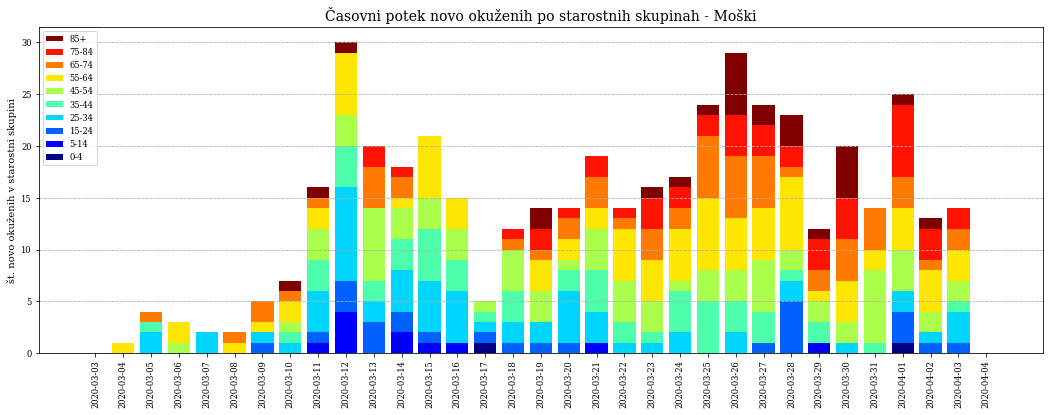

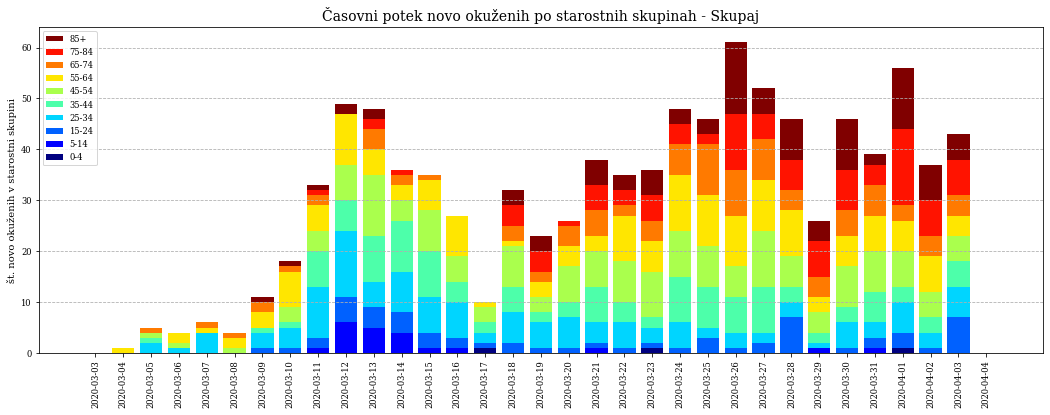

In [2]:
import matplotlib as mpl
import cycler

color = plt.cm.jet(np.linspace(0,1,10))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

sample = generate_sample()
yf, ym = groupby_age_groups(sample, age_groups1)[:,0-day_from_first_case:]
age_group_labels = parse_age_groups_i(age_groups1)
date_labels = sample['date'][0-day_from_first_case:]
plot_age_groups(yf, age_group_labels, date_labels, cumulative=False, invert=False, figsize=(18,6),
                title='Časovni potek novo okuženih po starostnih skupinah - Ženske',
                filename='figures/age_demography_female.png')
plot_age_groups(ym, age_group_labels, date_labels, figsize=(18,6),
                title='Časovni potek novo okuženih po starostnih skupinah - Moški',
                filename='figures/age_demography_male.png')
plot_age_groups(yf+ym, age_group_labels, date_labels, figsize=(18,6),
                title='Časovni potek novo okuženih po starostnih skupinah - Skupaj',
                filename='figures/age_demography_total.png')